# Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/Drive")

base_path = "/content/Drive/MyDrive/NLP-Course/03-Text-Classification/"

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


# Scikit-learn Primer

In this section we'll perform a fairly simple classification exercise with scikit-learn. In the next section we'll leverage the machine learning strength of scikit-learn to perform natural language classifications.

# Perform Imports and Load Data
For this exercise we'll be using the **SMSSpamCollection** dataset from [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) that contains more than 5 thousand SMS phone messages.<br>You can check out the [**sms_readme**](../TextFiles/sms_readme.txt) file for more info.

The file is a [tab-separated-values](https://en.wikipedia.org/wiki/Tab-separated_values) (tsv) file with four columns:
> **label** - every message is labeled as either ***ham*** or ***spam***<br>
> **message** - the message itself<br>
> **length** - the number of characters in each message<br>
> **punct** - the number of punctuation characters in each message

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv(base_path + 'smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
print("Number of Rows    :", df.shape[0])
print("Number of Columns :", df.shape[1])

Number of Rows    : 5572
Number of Columns : 4


## Check for missing values:
Machine learning models usually require complete data.

In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

## Take a quick look at the *ham* and *spam* `label` column:

In [5]:
df["label"].unique()

array(['ham', 'spam'], dtype=object)

In [6]:
value_counts_df = df["label"].value_counts()

temp_df = pd.DataFrame()
temp_df["Label"] = value_counts_df.index
temp_df["Count"] = value_counts_df.values
temp_df["Percentage (%)"] = round(temp_df["Count"] / value_counts_df.values.sum(), 3) * 100
temp_df

,Label,Count,Percentage (%)
0,ham,4825,86.6
1,spam,747,13.4


<font color=lightgreen>We see that 4825 out of 5572 messages, or 86.6%, are ham.<br>This means that any machine learning model we create has to perform **better than 86.6%** to beat random chance.</font>

## Visualize the data:
Since we're not ready to do anything with the message text, let's see if we can predict ham/spam labels based on message length and punctuation counts. We'll look at message `length` first:

In [7]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [8]:
# Matplotlib and Seaborn for plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

<font color=lightgreen>This dataset is extremely skewed. The mean value is 80.5 and yet the max length is 910. Let's plot this on a logarithmic x-axis.</font>

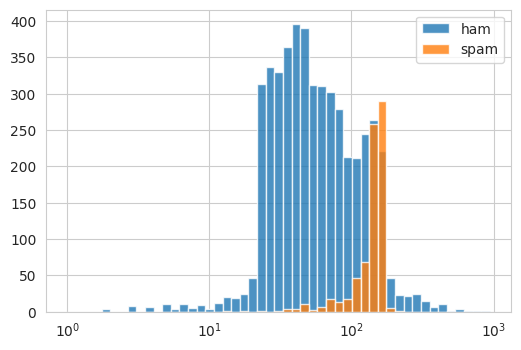

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(dpi=100)
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

<font color=lightgreen>It looks like there's a small range of values where a message is more likely to be spam than ham.</font>

Now let's look at the `punct` column:

In [10]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

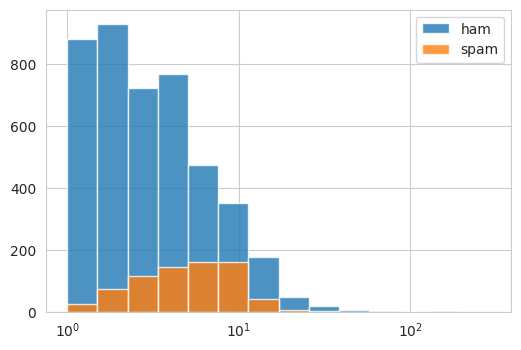

In [11]:
plt.figure(dpi=100)
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

<font color=lightgreen>This looks even worse - there seem to be no values where one would pick spam over ham. We'll still try to build a machine learning classification model, but we should expect poor results.</font>

# Split the data into train & test sets:

## Selecting features

In [12]:
X = df.drop(columns=["label", "message"]) # Dropping the label and message columns
y = df["label"] # Saving the label column

# Trying to predict the label using the length of the message and punctuation used in it

## Additional train/test/split arguments:


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (4457, 2)
Testing Data Shape:  (1115, 2)


<font color="lightgreen">NOTE : The Machine Learning Algorithm that gives us the accuracy above 86.6 % will be acceptable</font>

# Training and Testing multiple Algorithms

In [14]:
from sklearn import metrics

mla_compare_list = []

def mla_testing(mla):
    # Training the Machine Learning Algorithm
    mla.fit(X_train, y_train)

    # Making Predictions
    y_pred = mla.predict(X_test)

    # Calculating the Accuracy Score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy Score :", accuracy, "\n\n")

    # Classification Report
    print("Classification Report :\n")
    print(metrics.classification_report(y_test, y_pred), "\n\n")

    # Confusion Matrix
    conf_matx = metrics.confusion_matrix(y_test, y_pred)
    conf_matx_df = pd.DataFrame(conf_matx, index=["True ham", "True span"], columns=["Predicted ham", "Predicted span"])
    ## Using Heatmap plot to show the Confusion Matrix
    plt.figure(dpi=80)
    sns.heatmap(conf_matx_df, annot=True, fmt='.0f')
    plt.title("Confuion Matrix - Heatmap", fontdict={"fontsize": 12, "fontweight":"bold"})
    plt.show()
    print("\n\n")

    mla_name = mla.__class__.__name__
    mla_compare_list.append([mla_name, round(accuracy, 3)])
    print(mla_name, "Done")

## Logistic Regression Classifier

Accuracy Score : 0.8385650224215246 


Classification Report :

              precision    recall  f1-score   support

         ham       0.87      0.96      0.91       966
        spam       0.10      0.03      0.04       149

    accuracy                           0.84      1115
   macro avg       0.48      0.50      0.48      1115
weighted avg       0.76      0.84      0.80      1115
 




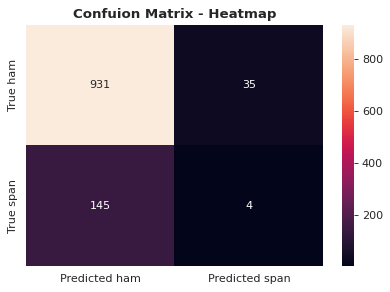




LogisticRegression Done


In [15]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='lbfgs')

mla_testing(classifier)

<font color=lightgreen>Logistic Regression Model gave the Accuracy of 0.839 which is less than 0.866 thus this model cannot be used.</font>

## naïve Bayes Classifier

Accuracy Score : 0.8573991031390135 


Classification Report :

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92       966
        spam       0.00      0.00      0.00       149

    accuracy                           0.86      1115
   macro avg       0.43      0.49      0.46      1115
weighted avg       0.75      0.86      0.80      1115
 




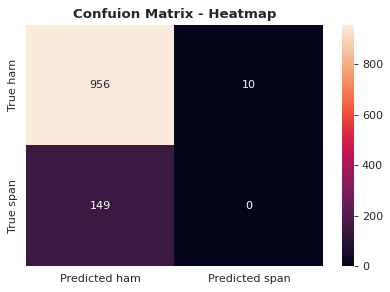




MultinomialNB Done


In [16]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

mla_testing(classifier)

<font color=lightgreen>MultinomialNB Model gave the Accuracy of 0.857 which is also less than 0.866 thus this model cannot be used.</font>

## Support Vector Classifier 
**from Support Vector Machine**

Accuracy Score : 0.884304932735426 


Classification Report :

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93       966
        spam       0.59      0.45      0.51       149

    accuracy                           0.88      1115
   macro avg       0.75      0.70      0.72      1115
weighted avg       0.87      0.88      0.88      1115
 




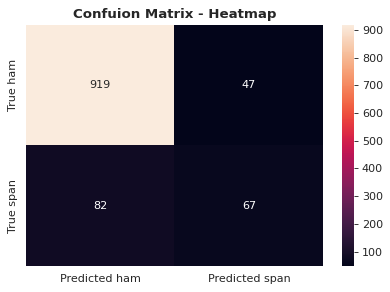




SVC Done


In [17]:
from sklearn.svm import SVC

classifier = SVC(gamma='auto')

mla_testing(classifier)

Accuracy Score : 0.8825112107623319 


Classification Report :

              precision    recall  f1-score   support

         ham       0.92      0.94      0.93       966
        spam       0.57      0.49      0.53       149

    accuracy                           0.88      1115
   macro avg       0.75      0.72      0.73      1115
weighted avg       0.88      0.88      0.88      1115
 




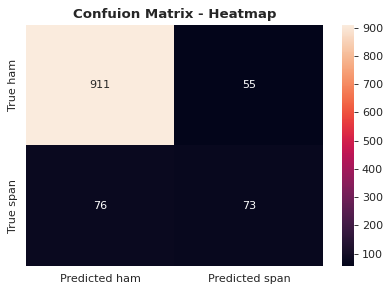




RandomForestClassifier Done


In [18]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

mla_testing(classifier)

In [19]:
from prettytable import PrettyTable

t = PrettyTable(["Classifier Name", "Classifier Accuracy"])

for row in mla_compare_list:
    t.add_row(row)

print(t)

+------------------------+---------------------+
|    Classifier Name     | Classifier Accuracy |
+------------------------+---------------------+
|   LogisticRegression   |        0.839        |
|     MultinomialNB      |        0.857        |
|          SVC           |        0.884        |
| RandomForestClassifier |        0.883        |
+------------------------+---------------------+


<font color="lightgreen">SVC and RandomForestClassifier were the best performing classifiers with accuracy above 86.6</font>